In [153]:
# solving non linear poisson equation using bvp's

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root

# define the equation
def q(x):
    return 0

# define the boundary conditions
alpha = 0
beta = 0

# define the domain
a = 0
b = 1

# define the number of grid points
N = 50

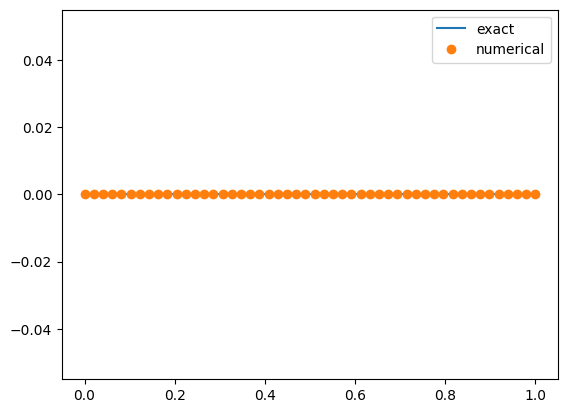

In [154]:
# discretise the domain
xi = np.linspace(a, b, N)

# solve using scipy root - f(u) = 0
def f(u, dx,N, q, alpha, beta):
    f_1 = (u[2] - 2*u[1] + alpha)/dx**2 + q(xi[1])
    f_i = (u[2:N] - 2*u[1:N-1] + u[:N-2])/dx**2 + q(xi[1:N-1])
    f_N1 = (beta - 2*u[N-1] + u[N-2])/dx**2 + q(xi[N-1])

    return np.concatenate(([f_1], f_i[:], [f_N1]))


dx = (b - a)/N
# initial guess
u = np.zeros(N)

sol = root(f, u, args=(dx,N, q, alpha, beta))

# separate the solution
u = sol.x

# exact solution for source term q(x) = 0
def exact(x):
    return ((beta - alpha)/(b - a))*(x- a) + alpha

# plot the exact solution
plt.plot(xi, exact(xi), '-', label='exact')

# plot the solution
plt.plot(xi, u, 'o', label='numerical')
plt.legend()
plt.show()

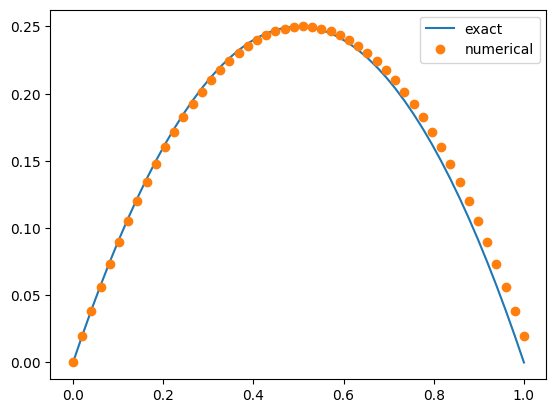

In [155]:
# now try for q(x) = 1

# define the equation
def q(x):
    return 1

# discretise the domain
xi = np.linspace(a, b, N)

# solve using scipy root - f(u) = 0
def f(u, dx,N, q, alpha, beta, D):
    f_1 = D*(u[2] - 2*u[1] + alpha)/dx**2 + q(xi[1])
    f_i = D*(u[2:N] - 2*u[1:N-1] + u[:N-2])/dx**2 + q(xi[1:N-1])
    f_N1 = D*(beta - 2*u[N-1] + u[N-2])/dx**2 + q(xi[N-1])

    return np.concatenate(([f_1], f_i[:], [f_N1]))


dx = (b - a)/N
# initial guess
u = np.zeros(N)

# D is the diffusion coefficient
D = 0.5

sol = root(f, u, args=(dx,N, q, alpha, beta, D))

# separate the solution
u = sol.x

# exact solution for source term q(x) = 1
def exact(x):
    return (-1/(2*D))*(x - a) * (x - b) + ((beta - alpha)/(b - a))*(x- a) + alpha

# plot the exact solution
plt.plot(xi, exact(xi), '-', label='exact')

# plot the solution
plt.plot(xi, u, 'o', label='numerical')
plt.legend()
plt.show()

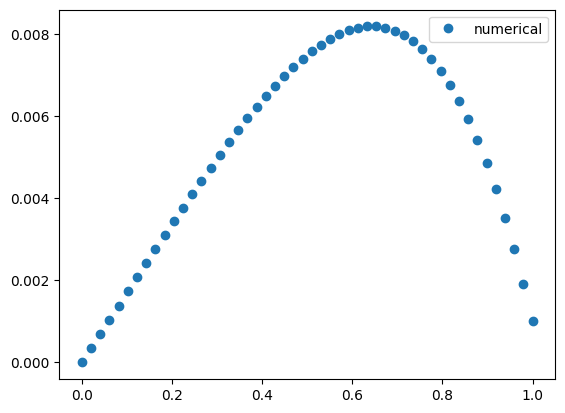

In [156]:
# now try for q(x) = x

# define the equation
def q(x):
    return x**2

# discretise the domain
xi = np.linspace(a, b, N)

# solve using scipy root - f(u) = 0
def f(u, dx,N, q, alpha, beta, D):
    f_1 = D*(u[2] - 2*u[1] + alpha)/dx**2 + q(xi[1])
    f_i = D*(u[2:N] - 2*u[1:N-1] + u[:N-2])/dx**2 + q(xi[1:N-1])
    f_N1 = D*(beta - 2*u[N-1] + u[N-2])/dx**2 + q(xi[N-1])

    return np.concatenate(([f_1], f_i[:], [f_N1]))


dx = (b - a)/N
# initial guess
u = np.zeros(N)

# D is the diffusion coefficient
D = 5

sol = root(f, u, args=(dx,N, q, alpha, beta, D))

# separate the solution
u = sol.x

# # exact solution for source term q(x) = x**2
# def exact(x):
#     return (1/(2*D))*(x - a)**2 * (x - b)**2 + ((beta - alpha)/(b - a))*(x- a) + alpha


# # plot the exact solution
# plt.plot(xi, exact(xi), '-', label='exact')

# plot the solution
plt.plot(xi, u, 'o', label='numerical')
plt.legend()
plt.show()


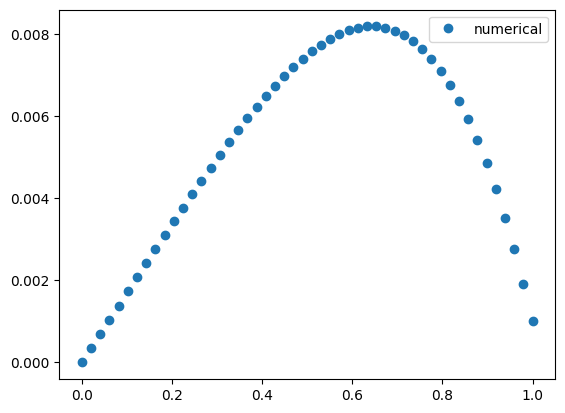

In [157]:
# now try for q(x) = x

# define the equation
def q(x):
    return x**2

# discretise the domain
xi = np.linspace(a, b, N)

# solve using scipy root - f(u) = 0
def f(u, dx,N, q, alpha, beta, D):
    f_1 = D*(u[2] - 2*u[1] + alpha)/dx**2 + q(xi[1])
    f_i = D*(u[2:N] - 2*u[1:N-1] + u[:N-2])/dx**2 + q(xi[1:N-1])
    f_N1 = D*(beta - 2*u[N-1] + u[N-2])/dx**2 + q(xi[N-1])

    return np.concatenate(([f_1], f_i[:], [f_N1]))


dx = (b - a)/N
# initial guess
u = np.zeros(N)

# D is the diffusion coefficient
D = 5

sol = root(f, u, args=(dx,N, q, alpha, beta, D))

# separate the solution
u = sol.x

# # exact solution for source term q(x) = x**2
# def exact(x):
#     return (1/(2*D))*(x - a)**2 * (x - b)**2 + ((beta - alpha)/(b - a))*(x- a) + alpha


# # plot the exact solution
# plt.plot(xi, exact(xi), '-', label='exact')

# plot the solution
plt.plot(xi, u, 'o', label='numerical')
plt.legend()
plt.show()


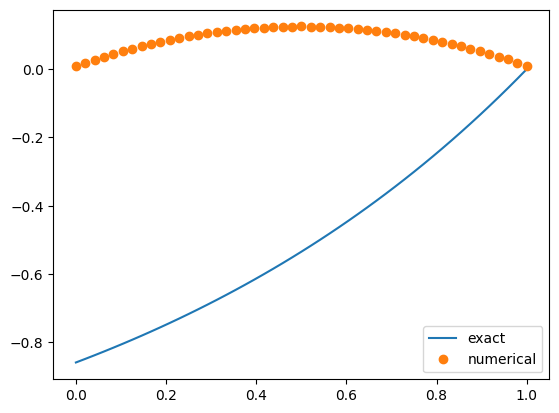

In [158]:
# now solve the same problem using numpy.linalg.solve - the Bratu problem

# discretise the domain
xi = np.linspace(a, b, N-1)

# initial guess
u = np.zeros(N-1)

# D is the diffusion coefficient
D = 1

# myu is the parameter in the source term
myu = 1

# define the equation - depends on the solution
def q(x,myu, u):
    return np.exp(myu*u)

# the form A_dd * u = -b_dd - dx**2 * q()

# define the matrix A_dd - N-1 by N-1 tridiagonal matrix
A_dd = np.zeros((N-1, N-1))
A_dd[0, 0] = -2
A_dd[0, 1] = 1
A_dd[N-2, N-2] = -2
A_dd[N-2, N-3] = 1
for i in range(1, N-2):
    A_dd[i, i] = -2
    A_dd[i, i+1] = 1
    A_dd[i, i-1] = 1

# define the vector b_dd
b_dd = np.zeros(N-1)
b_dd[0] = alpha
b_dd[N-2] = beta

# define the source term vector
q_vec = np.zeros(N-1)
for i in range(1, N-1):
    q_vec[i] = q(xi[i], myu, u[i])

# solve the system
u = np.linalg.solve(A_dd, -b_dd - dx**2 * q_vec)


# the exact solution for the Bratu problem
def exact(x, myu):
    return 1/(1 + myu*(b - a)) * (np.exp(myu*(x - a)) - np.exp(myu*(b - a)))

# plot the exact solution
plt.plot(xi, exact(xi, myu), '-', label='exact')


# plot the solution
plt.plot(xi, u, 'o', label='numerical')
plt.legend()
plt.show()


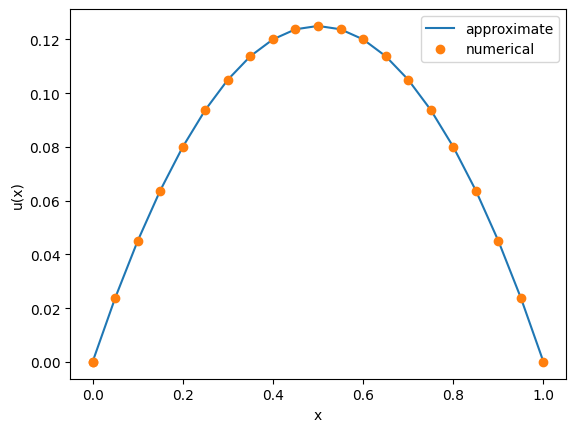

In [159]:
# solving the Bratu problem using scipy root - f(u) = 0
N = 20

# define the boundary conditions
alpha = 0
beta = 0
a = 0
b = 1

# discretise the domain
xi = np.linspace(a, b, N, endpoint=False)

# D is the diffusion coefficient, myu is the parameter in the source term
D = 1.0
myu = 0.00001 # using small myu as can be approximated by q(x) = 1

# define the equation - depends on the solution
def q(x,myu, u):
    return np.exp(myu*u)

# solve using scipy root - f(u) = 0
def f(u, dx,N, q, alpha, beta, D, myu):
    f_1 = D*(u[2] - 2*u[1] + alpha)/dx**2 + q(xi[1], myu, u[1])
    f_i = D*(u[2:N] - 2*u[1:N-1] + u[:N-2])/dx**2 + q(xi[1:N-1], myu, u[1:N-1])
    f_N1 = D*(beta - 2*u[N-1] + u[N-2])/dx**2 + q(xi[N-1], myu, u[N-1])

    return np.concatenate(([f_1], f_i[:], [f_N1]))

dx = (b - a)/N
# initial guess
u = np.zeros(N)

sol = root(f, u, args=(dx,N, q, alpha, beta, D, myu))

# separate the solution
u = sol.x

# concatenate the boundary conditions back in
u = np.concatenate(([alpha], u[:], [beta]))

# concatenate the boundary points back in
xi = np.concatenate(([a], xi[:], [b]))

# exact solution for source term q(x) = 1
def exact(x):
    return (-1/(2*D))*(x - a) * (x - b) + ((beta - alpha)/(b - a))*(x- a) + alpha

# plot the exact solution
plt.plot(xi, exact(xi), '-', label='approximate')

# plot the solution
plt.plot(xi, u, 'o', label='numerical')
plt.legend()
plt.xlabel('x')
plt.ylabel('u(x)')
plt.show()


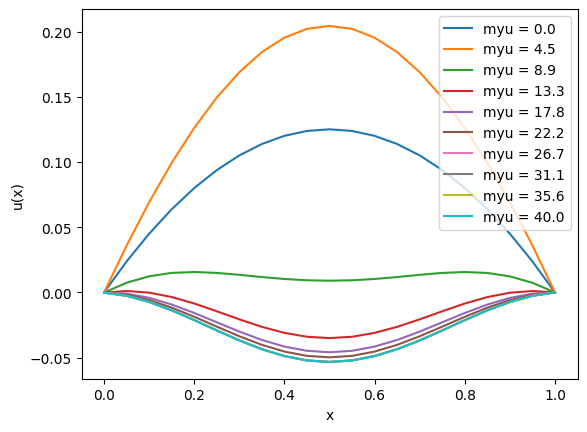

In [166]:
# plot the numerical solution to the bratu problem for myu range

# define the boundary conditions
alpha = 0.0
beta = 0.0
a = 0.0
b = 1.0
D = 1.0

# discretise the domain
N = 20
xi = np.linspace(a, b, N, endpoint=False)

# define the equation -> depends on the solution
def q(x,myu, u):
    return np.exp(myu*u)

# solve using scipy root -> f(u) = 0
def f(u, dx,N, q, alpha, beta, D, myu):
    f_1 = D*(u[2] - 2*u[1] + alpha)/dx**2 + q(xi[1], myu, u[1])
    f_i = D*(u[2:N] - 2*u[1:N-1] + u[:N-2])/dx**2 + q(xi[1:N-1], myu, u[1:N-1])
    f_N1 = D*(beta - 2*u[N-1] + u[N-2])/dx**2 + q(xi[N-1], myu, u[N-1])

    return np.concatenate(([f_1], f_i[:], [f_N1]))

# define the step size
dx = (b - a)/N

# initial guess -> pre-allocated array
u = np.zeros(N)

for myu in np.linspace(0.01, 40, 10):

    sol = root(f, u, args=(dx,N, q, alpha, beta, D, myu))

    # separate the solution
    u = sol.x

    # concatenate the boundary conditions back in
    u_plot = np.concatenate(([alpha], u[:], [beta]))

    # concatenate the boundary points back in
    xi_plot = np.concatenate(([a], xi[:], [b]))

    # plot the solution
    plt.plot(xi_plot, u_plot, label='myu = %.1f' % myu)

plt.legend()
plt.xlabel('x')
plt.ylabel('u(x)')
plt.show()
